### Heroes Of Pymoli Data Analysis
* Of the 1163 active players, the vast majority are **male** (84%). There also exists, a smaller, but notable proportion of female players (14%).


* Our peak age demographic falls between **20-24** (46.8%) with secondary groups falling between 15-19 (17.4%) and 25-29 (12.9%).  


* Also when we check the purchasing power of each age group we also found **20-24** to the most as well.


* Our most popular item being sold is ** *Oathbreaker, Last Hope of the Breaking Storm* ** and it also give us the highest revenue since we don't know actual profit, we assume highest revenue also mean highest profit although this might not be the case

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Raw data file
file_to_load = "Resources/purchase_data.csv"

# Read purchasing file and store into pandas data frame
purchase_data = pd.read_csv(file_to_load)


#you could use this to remove duplicate too so you don't have to find duplicate later
# player_demographics = player_demographics.drop_duplicates()


In [2]:
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [3]:
unique_players = purchase_data['SN'].nunique()
player_count_df = pd.DataFrame({'total_players': [unique_players]})
player_count_df

,total_players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.
* Creating a summary data frame to hold the results
* Display the summary data frame


In [4]:
unique_items = purchase_data['Item ID'].nunique()
average_purchase_price = purchase_data['Price'].mean()
total_num_purchases = purchase_data.count()[0]
total_revenues = purchase_data['Price'].sum()

In [5]:
summary_df = pd.DataFrame({'unique items': [unique_items],
                  'average price': [average_purchase_price],
                  'number of purchases': [total_num_purchases],
                  'total revenues': [total_revenues]})

summary_df["average price"] = summary_df["average price"].map("${:,.2f}".format)
summary_df["number of purchases"] = summary_df["number of purchases"].map("{:,}".format)
summary_df["total revenues"] = summary_df["total revenues"].map("${:,.2f}".format)
summary_df

,unique items,average price,number of purchases,total revenues
0,183,$3.05,780,"$2,379.77"


## Gender Demographics

* Run basic calculations to obtain number of unique items, average price, etc.

* Creating a summary data frame to hold the results

* Displaying the summary data frame


In [6]:
#this is optional notes not used in the analysis

#selecting all row that have duplicated data including first occruence
duped = purchase_data.duplicated('SN', False)
# this return a list of boolean of all duplicated row set to true

#converting the list of boolean to show only non dupllicated so all the duplicated will become false
no_dups_SN = [False if i == True else True for i in duped]
# this return a list of boolean of all duplicated row set to False

#creating dataframe without any duplicate even ignoring first occurence
no_dup_df = purchase_data[no_dups_SN]

#creating dataframe of only duplicate just to quick see it's correct
dup_only_df = purchase_data[duped]

In [7]:
#creating dataframe of only unqiue SN, first occurence is True
only_unique_SN = [False if i == True else True for i in purchase_data.duplicated('SN')]


#creating dataframe of only unique
unique_SN_df = purchase_data[only_unique_SN]

total_male_female_count = unique_SN_df.groupby('Gender').count()['SN']

gender_df = pd.DataFrame({'Gender_count': total_male_female_count})
gender_df['% of gender'] = ((gender_df['Gender_count']/unique_players)*100).round(2)
gender_df

,Gender_count,% of gender
Gender,,
Female,81,14.06
Male,484,84.03
Other / Non-Disclosed,11,1.91



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, etc. by gender
* For normalized purchasing, divide total purchase value by purchase count, by gender
* Create a summary data frame to hold the results
* Display the summary data frame

In [8]:
# Each variable below is breaking down by gender
# Purchase Count
# Average Purchase Price
# Total Purchase Value
# Normalized Totals
purchase_count = purchase_data.groupby('Gender').count()['Purchase ID']
avg_purchase_price = purchase_data.groupby('Gender').mean()['Price']
total_purchase_value = purchase_data.groupby('Gender').sum()['Price']
normalized_average = total_purchase_value/gender_df['Gender_count']

purchase_by_gender_df = pd.concat([purchase_count, avg_purchase_price, total_purchase_value, normalized_average], axis=1)

purchase_by_gender_df.columns = ['Purchase Count', 'Average Purchase Price','Total Purchase Value','Normalized Totals']


#formatting $
purchase_by_gender_df["Average Purchase Price"] = purchase_by_gender_df["Average Purchase Price"].map("${:,.2f}".format)
purchase_by_gender_df['Total Purchase Value'] = purchase_by_gender_df['Total Purchase Value'].map("${:,.2f}".format)
purchase_by_gender_df['Normalized Totals'] = purchase_by_gender_df['Normalized Totals'].map("${:,.2f}".format)

purchase_by_gender_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Normalized Totals
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages
* Categorize the existing players using the age bins. Hint: use pd.cut()
* Calculate the numbers and percentages by age group
* Create a summary data frame to hold the results
* Display Age Demographics Table


In [9]:
player_demographics = purchase_data.loc[:, ["Gender", "SN", "Age"]]
player_demographics.head()

,Gender,SN,Age
0,Male,Lisim78,20
1,Male,Lisovynya38,40
2,Male,Ithergue48,24
3,Male,Chamassasya86,24
4,Male,Iskosia90,23


In [10]:
# Establish bins for ages

#ending range is inclusve here but the end is exclusive
age_bins = [0, 9.90, 14.90, 19.90, 24.90, 29.90, 34.90, 39.90, 9999]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]


player_demographics["Age Ranges"] = pd.cut(player_demographics["Age"], age_bins, labels=group_names)

player_age_count = player_demographics['Age Ranges'].value_counts()
total_player = player_demographics.count()['SN']
player_age_count = player_demographics.groupby('Age Ranges').count()['SN']
df = pd.DataFrame(player_age_count)

df.rename(columns={'SN': 'count of player'}, inplace=True)
df['% of player'] = (df['count of player']/total_player) * 100
df

,count of player,% of player
Age Ranges,,
<10,23,2.948718
10-14,28,3.589744
15-19,136,17.435897
20-24,365,46.794872
25-29,101,12.948718
30-34,73,9.358974
35-39,41,5.256410
40+,13,1.666667


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age
* Run basic calculations to obtain purchase count, avg. purchase price, etc. in the table below
* Calculate Normalized Purchasing
* Create a summary data frame to hold the results
* Display the summary data frame

In [11]:
purchase_data['age_group'] = pd.cut(player_demographics["Age"], age_bins, labels=group_names)
count = (purchase_data.groupby('age_group').count()['SN']).rename('purchase count')
average_price = purchase_data.groupby('age_group').mean()['Price']
sum_price = purchase_data.groupby('age_group').sum()['Price']
normalized_total = sum_price/count

purchase_df_by_age = pd.concat([count, average_price, sum_price, normalized_total], axis=1)
purchase_df_by_age.columns = ['count', 'average price', 'total purchase', 'normal total']

In [12]:
#applying string formatting to number
purchase_df_by_age['average price'] = purchase_df_by_age['average price'].map("${:,.2f}".format)
purchase_df_by_age['total purchase'] = purchase_df_by_age['total purchase'].map("${:,.2f}".format)
purchase_df_by_age['normal total'] = purchase_df_by_age['normal total'].map("${:,.2f}".format)


purchase_df_by_age

,count,average price,total purchase,normal total
age_group,,,,
<10,23,$3.35,$77.13,$3.35
10-14,28,$2.96,$82.78,$2.96
15-19,136,$3.04,$412.89,$3.04
20-24,365,$3.05,"$1,114.06",$3.05
25-29,101,$2.90,$293.00,$2.90
30-34,73,$2.93,$214.00,$2.93
35-39,41,$3.60,$147.67,$3.60
40+,13,$2.94,$38.24,$2.94


In [13]:
#testing for stripping away $ and ',' if exist irrlevant to overall analysis
# float(purchase_df_by_age['total purchase'][0].strip('$').replace(',','')


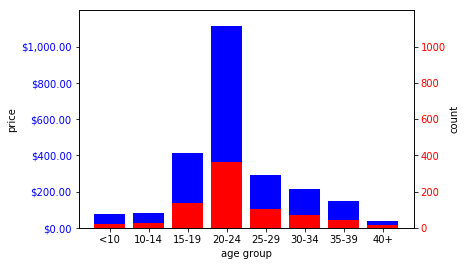

In [14]:
#quick check to see the distribution of total purchase vs purchase item count per age group to see if it's the same
fig, ax1 = plt.subplots()
plt.ylim(ymax=1200)
ax1.set_ylabel('price')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.yticks(range(0, 1200, 200), list(map(lambda x: "${:,.2f}".format(x), range(0,1200,200))))
ax1.bar(purchase_df_by_age.index.values, [float(i.strip('$').replace(',','')) for i in purchase_df_by_age['total purchase']], color = 'blue')

ax2 = ax1.twinx()

plt.ylim(ymax=1200)
ax2.set_ylabel('count')
ax2.tick_params(axis='y', labelcolor = 'red')
plt.yticks(range(0, 1200, 200))
ax2.bar(df.index.values, df['count of player'], color = 'red')
ax1.set_xlabel('age group')

plt.show()

## Top Spenders

* Run basic calculations
* Create a summary data frame to hold the results
* Sort the total purchase value column in descending order
* Display a preview of the summary data frame

In [15]:
#Purchase Count	Average Purchase Price	Total Purchase Value
purchase_count = purchase_data.groupby('SN').count()['Purchase ID']
avg_price = purchase_data.groupby('SN').mean()['Price']
total_price = purchase_data.groupby('SN').sum()['Price']
top_spenders_df = pd.DataFrame({'Purchase Count': purchase_count, 'Average Purchase Price': avg_price, 'Total Purchase Value': total_price})


top_spenders_df.sort_values(by=['Total Purchase Value'], ascending=False, inplace=True)

#applying string formating to numbers
top_spenders_df['Average Purchase Price'] = top_spenders_df['Average Purchase Price'].map("${:,.2f}".format)
top_spenders_df['Total Purchase Value'] = top_spenders_df['Total Purchase Value'].map("${:,.2f}".format)


top_spenders_df.head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [16]:
count = purchase_data.groupby(['Item ID', 'Item Name']).count()['SN'].rename('Purchase Count')
item_price = purchase_data.groupby(['Item ID', 'Item Name']).mean()['Price'].rename('item price')
item_total_price = purchase_data.groupby(['Item ID', 'Item Name']).sum()['Price'].rename('revenue')
popular_items_df = pd.concat([count, item_price, item_total_price], axis = 1)
popular_items_df = popular_items_df.sort_values(by=['Purchase Count'], ascending=False).head()



#applying string formating to numbers
popular_items_df['item price'] = popular_items_df['item price'].map("${:,.2f}".format)
# popular_items_df['revenue'] = popular_items_df['revenue'].map("${:,.2f}".format)


# top_spenders_df['Total Purchase Value'] = top_spenders_df['Total Purchase Value'].map("${:,.2f}".format)
popular_items_df

,,Purchase Count,item price,revenue
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,50.76
145,Fiery Glass Crusader,9,$4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,31.77
82,Nirvana,9,$4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order
* Display a preview of the data frame



In [17]:
#most profitable based on revenue(total $ sold)
profitable_item_df = popular_items_df.sort_values(by=['revenue'], ascending=False)

In [18]:
profitable_item_df

,,Purchase Count,item price,revenue
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,50.76
82,Nirvana,9,$4.90,44.10
145,Fiery Glass Crusader,9,$4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,31.77
19,"Pursuit, Cudgel of Necromancy",8,$1.02,8.16
